# Assignement 3 - Filippo Conforto

In [3]:
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Exercise 1

In [40]:
dtriang = function(x, a, b, c=(a+b)/2) {
    ifelse((x < c) & (x >= a), 2*(x-a)/((b-a)*(c-a)), ifelse((x <= b) & (x >= c), 2*(b-x)/((b-a)*(b-c)),0))
}

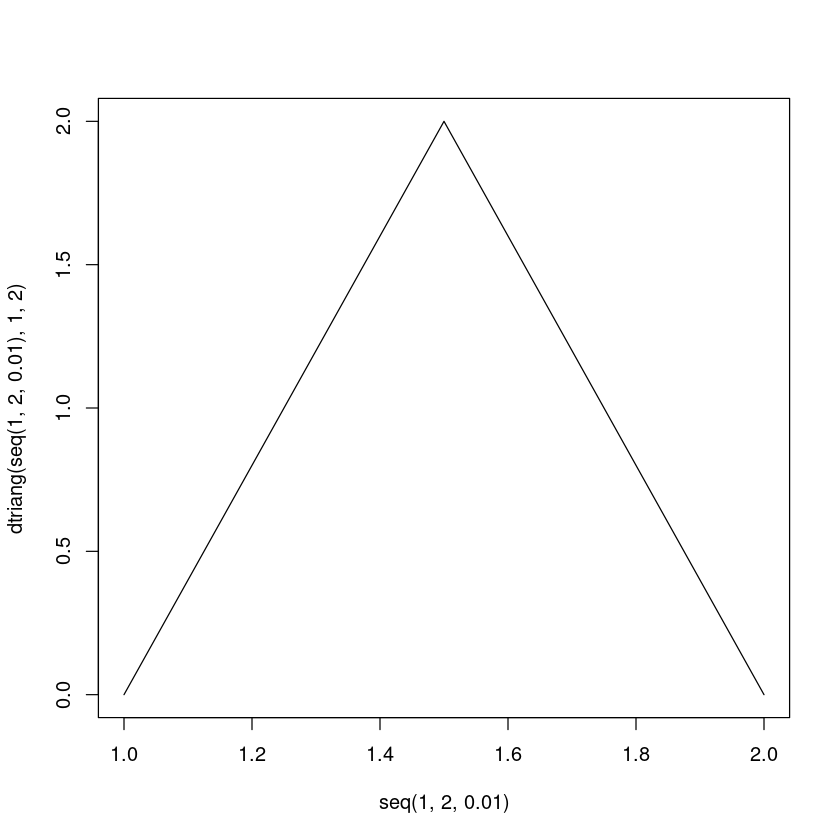

In [20]:
plot(seq(1,2,0.01),dtriang(seq(1,2,0.01),1,2), t= "l")

In [29]:
ptriang <- function (x, a,b, c=(a+b)/2) {
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse((x < c) & (x >= a), ((x-a)^2)((b-a)*(c-a)), ifelse((x <= b) & (x >= c), (2*b*x-x^2)/((b-a)*(b-c))+G,0)))
}

In [28]:
qtriang <- function (p, a,b, c=(a+b)/2) {
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse(p < k , sqrt((b-a)*(c-a)*p)+a,b-sqrt(b^2+(b-a)*(b-c)*(G-p))))
}

In [24]:
rtriang <- function (n, a,b, c=(a+b)/2) {
    us = runif(n)
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse(us < k , sqrt((b-a)*(c-a)*us)+a,b-sqrt(b^2+(b-a)*(b-c)*(G-us))))
}

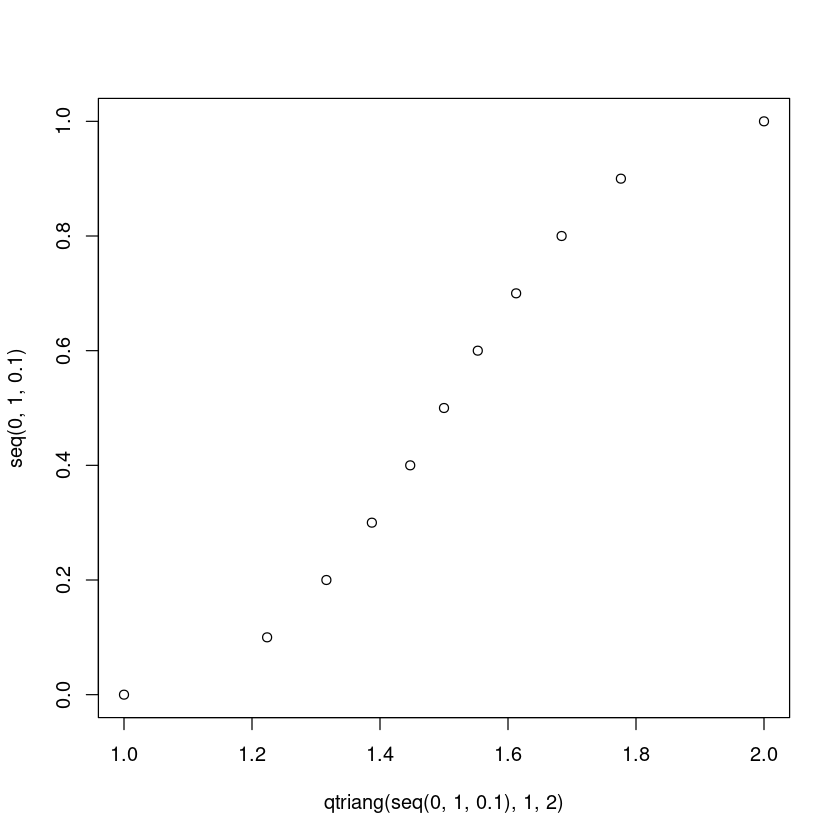

In [17]:
plot(qtriang(seq(0,1,0.1),1,2), seq(0,1,0.1))

In [48]:
data = data.frame(samp = rtriang(10000,1,2), plot = dtriang(seq(1,2,l=10000),1,2), x = seq(1,2,l=10000))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



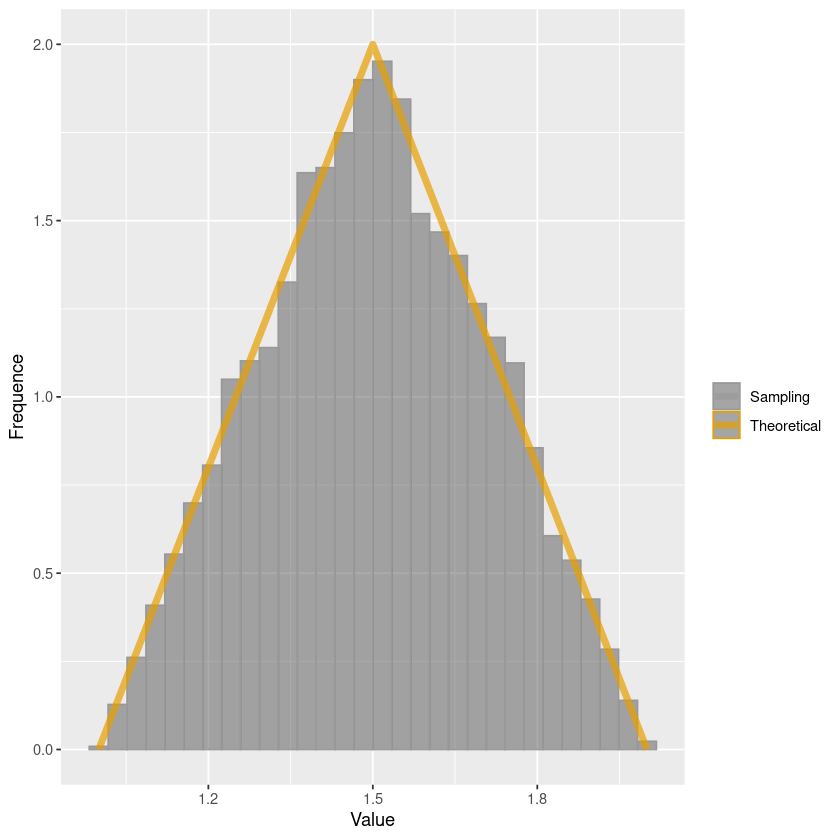

In [71]:
ggplot() + 
    geom_histogram(data = data, aes(x = samp, y=..density..,color = "Sampling"), alpha = 0.5) +
    geom_line(data = data, aes(x = x, y = plot, color = "Theoretical" ), size = 2, alpha = 0.7) +
    labs( x="Value", y= "Frequence", color = "") +
    scale_color_manual(values=c('#999999','#E69F00'))

## Exercise 2

In [9]:
G = function(f) {
    1-f
}

In [172]:
funcs = list(pexp, punif, pbinom, ppois)
args = list( list(rate = 1),list(min=3,max=5),list(size=1,prob=1/2),list(lambda = 1/2))
results = invoke_map(funcs, args, seq(0,10,0.1))
results = map(results,G) 

In [173]:
x = seq(0,10,0.1)
means= c(1,4,1/2,1)

In [174]:
data = data.frame( exp = results[[1]], unif = results[[2]], binom = results[[3]], pois = results[[4]], x=x)

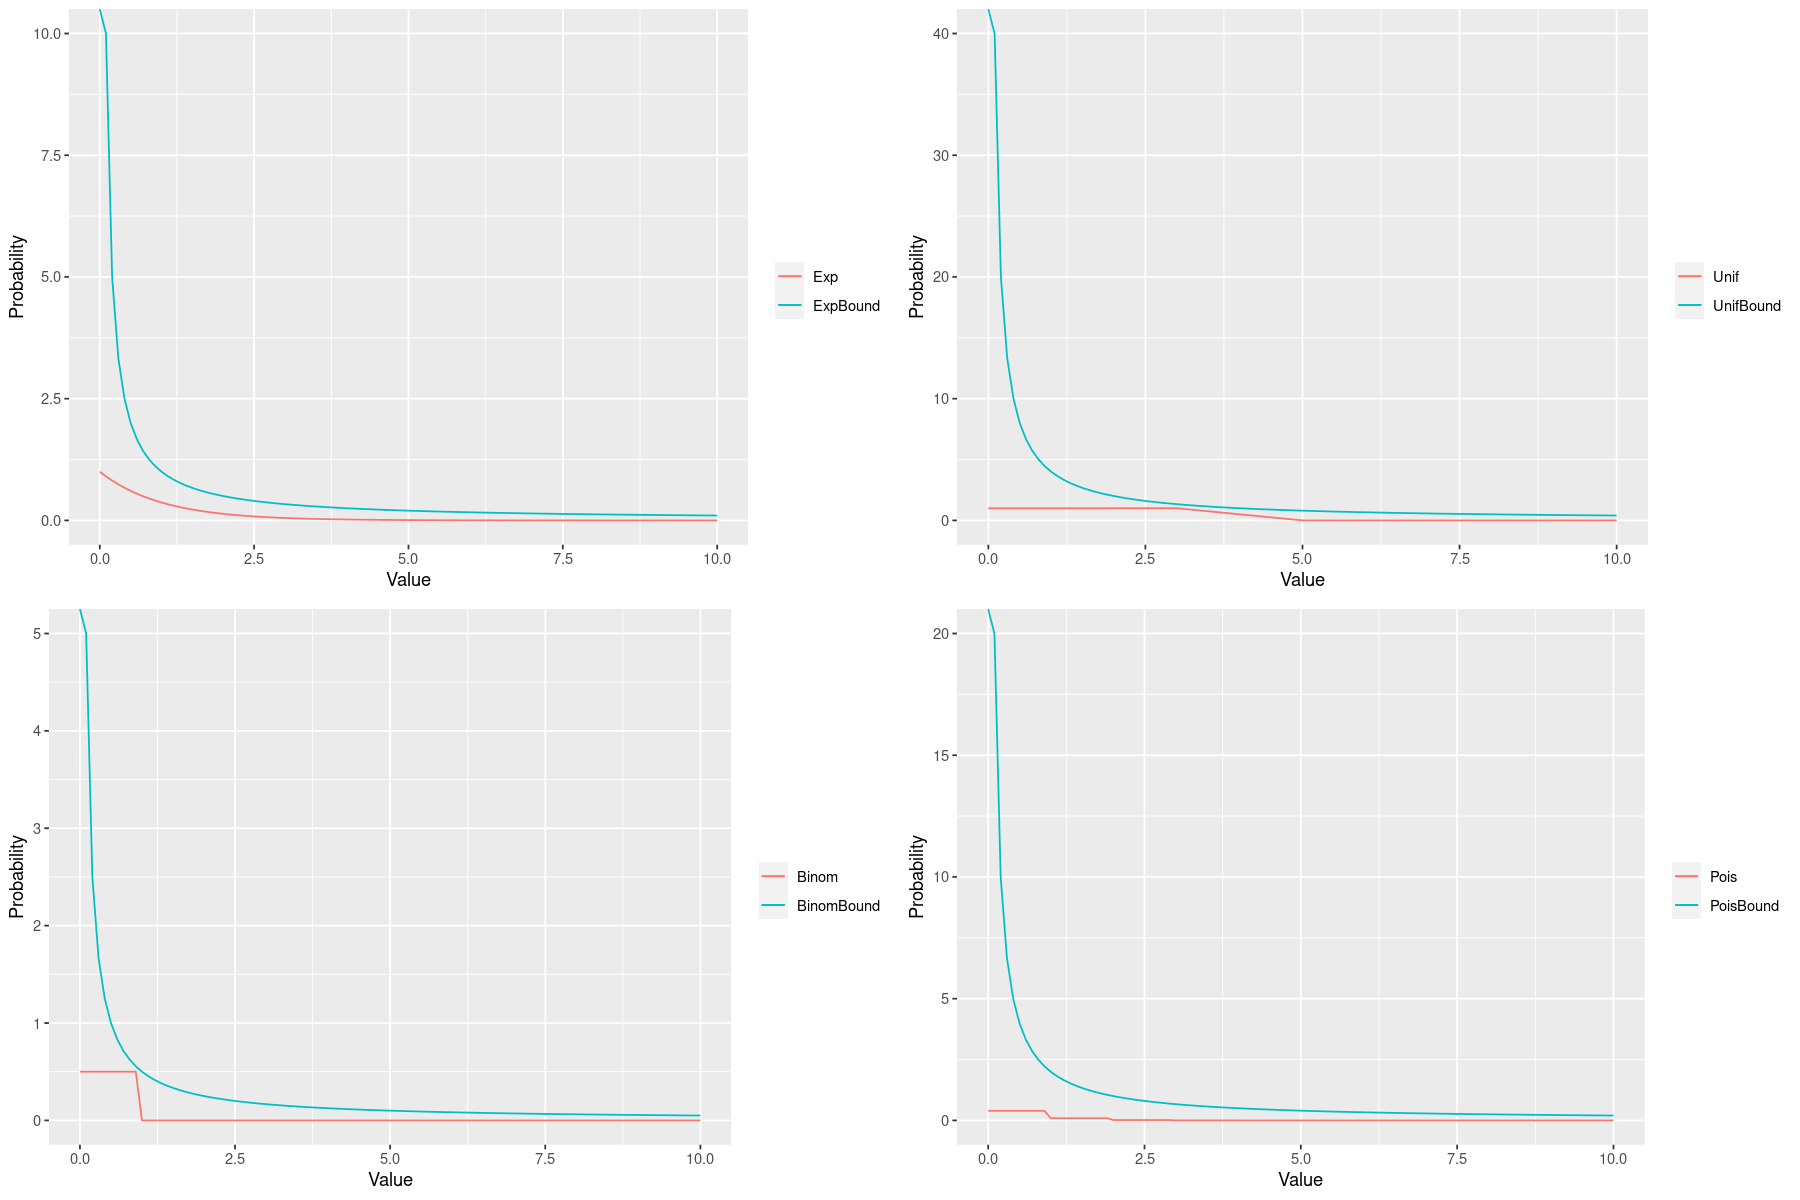

In [175]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = data) + 
    geom_line(aes(x = x, y = exp, color = "Exp")) +
    geom_line(aes(x = x, y = 1/x, color = "ExpBound")) +
    labs( x="Value", y= "Probability", color = "")
p2 = ggplot(data = data) + 
    geom_line(aes(x = x, y = unif, color = "Unif")) +
    geom_line(aes(x = x, y = 4/x, color = "UnifBound")) +
    labs( x="Value", y= "Probability", color = "")
p3 = ggplot(data = data) + 
    geom_line(aes(x = x, y = binom, color = "Binom")) +
    geom_line(aes(x = x, y = 0.5/x, color = "BinomBound")) +
    labs( x="Value", y= "Probability", color = "")
p4 =ggplot(data = data) + 
    geom_line(aes(x = x, y = pois, color = "Pois")) +
    geom_line(aes(x = x, y = 2/x, color = "PoisBound")) +
    labs( x="Value", y= "Probability", color = "")
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

## Exercise 3

In [17]:
intprob = function(f,k, mean, var,args) {
    #message(args)
    message
    do.call(f,c(list(q=mean - k*var ), args)) + 1 - do.call(f,c(list(q=k*var + mean), args))
}

In [27]:
funcs = c(pnorm,pexp,punif, ppois)
args = list( list(mean = 3, sd=5),list(rate=1),list(min=1-sqrt(2), max = 1+sqrt(2)),list(lambda = 1/3))

res = list(f = funcs, k = list(seq(0,10,0.1),seq(0,10,0.1),seq(0,10,0.1),seq(0,10,0.1)), mean= c(3,1,1,1/3), var = c(5,1,2/3,1/3), args = args) %>% pmap ( intprob )

In [28]:
x = seq(0,10,0.1)

data = data.frame( norm = res[[1]], exp = res[[2]], unif = res[[3]], pois = res[[4]], x=x)

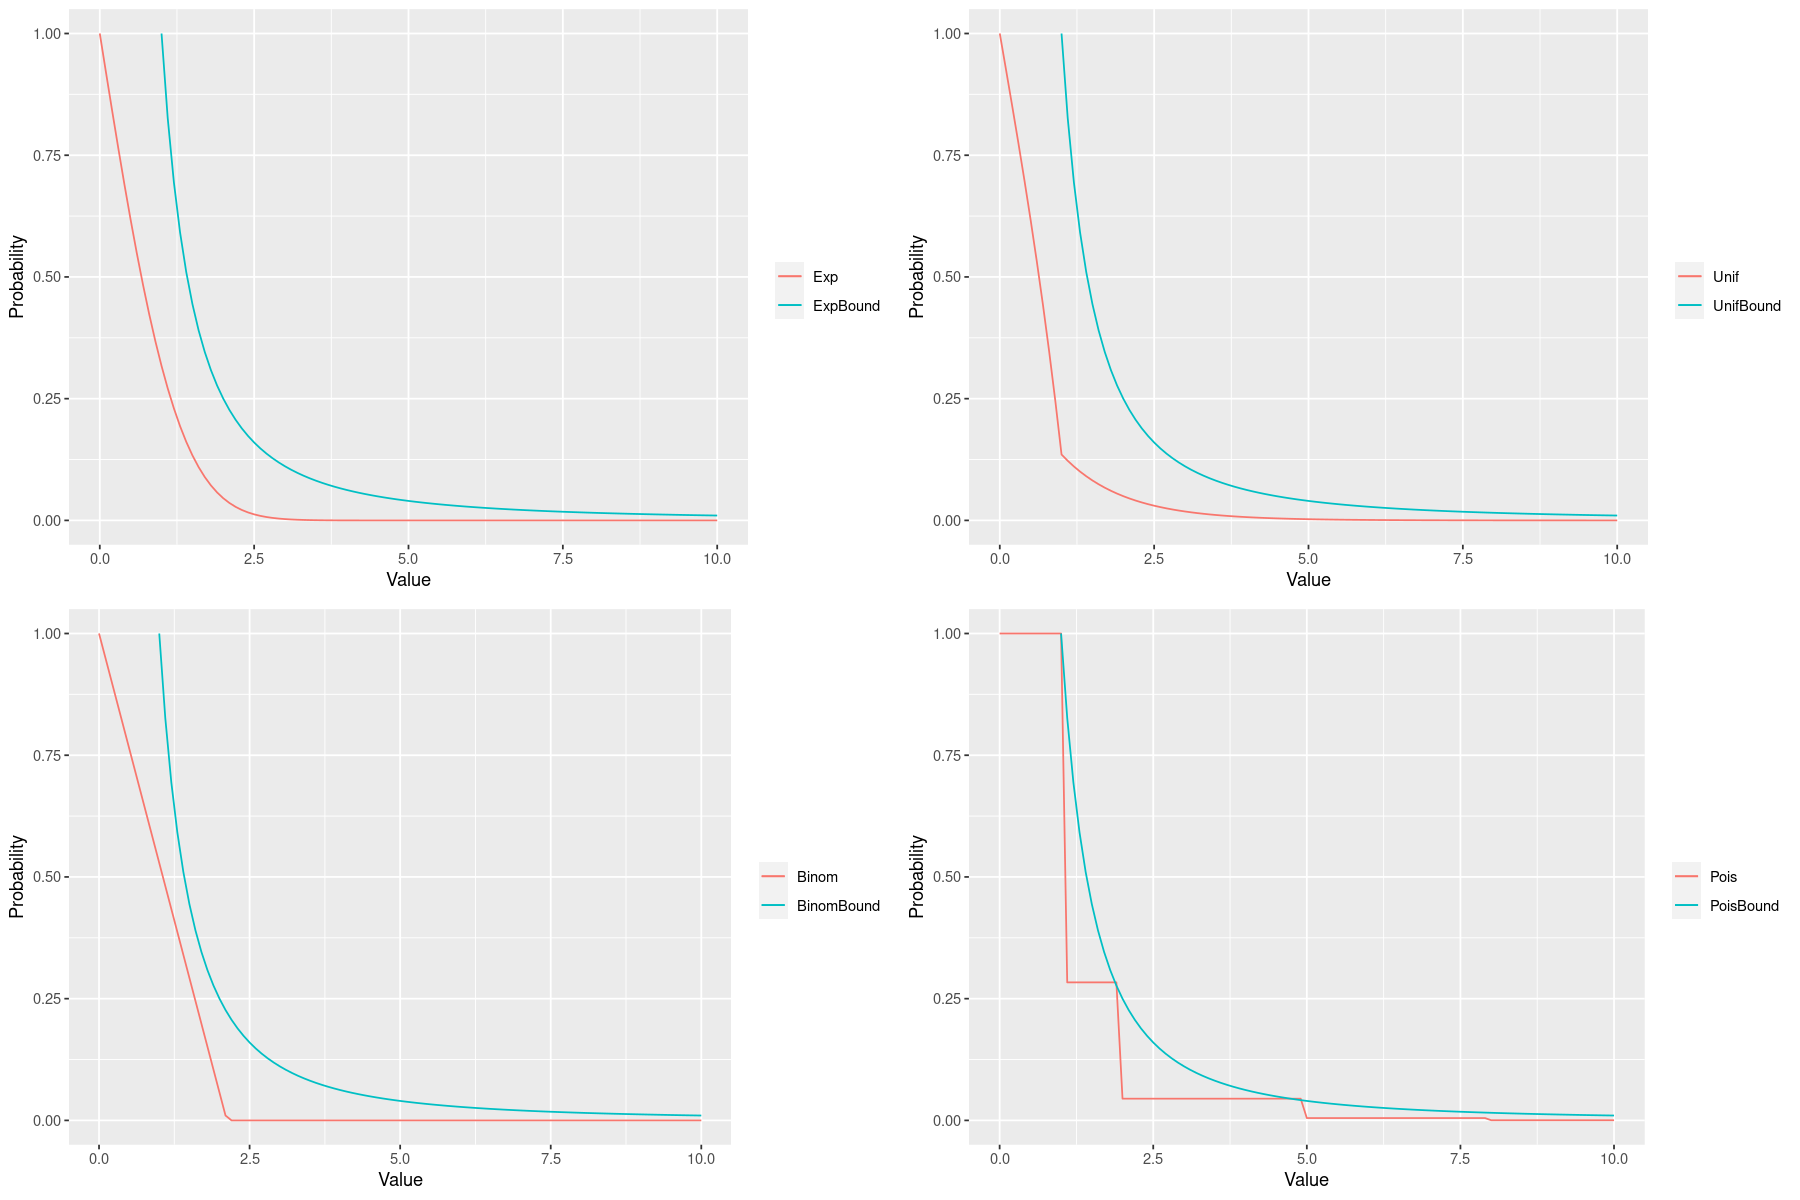

In [29]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = data) + 
    geom_line(aes(x = x, y = norm, color = "Exp")) +
    geom_line(aes(x = x, y = 1/x^2, color = "ExpBound")) +
    labs( x="Value", y= "Probability", color = "")+
    ylim(0,1)
p2 = ggplot(data = data) + 
    geom_line(aes(x = x, y = exp, color = "Unif")) +
    geom_line(aes(x = x, y = 1/x^2, color = "UnifBound")) +
    labs( x="Value", y= "Probability", color = "")+
    ylim(0,1)
p3 = ggplot(data = data) + 
    geom_line(aes(x = x, y = unif, color = "Binom")) +
    geom_line(aes(x = x, y = 1/x^2, color = "BinomBound")) +
    labs( x="Value", y= "Probability", color = "")+
    ylim(0,1)
p4 =ggplot(data = data) + 
    geom_line(aes(x = x, y = pois, color = "Pois")) +
    geom_line(aes(x = x, y = 1/x^2, color = "PoisBound")) +
    labs( x="Value", y= "Probability", color = "") +
    ylim(0,1)
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

## Exercise 4

In [1]:
read_gdata <- function ( country, dir) {
filename <- paste0( "2020_", country , "_Region_Mobility_Report.csv")
filepath <- file.path(dir , filename )
read_csv (filepath)
}

In [4]:
country = c("IT","JP","IN")
dir="./Region_Mobility_Report_CSVs"
gdata  = map_df( country , read_gdata, dir)
gdata = mutate(gdata, date = lubridate::week(date))
gdata = gdata[is.na(gdata$sub_region_1) ,]


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(

In [5]:
week_gdata = gdata %>% group_by(country_region, date) %>% summarise (ret_recr_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.



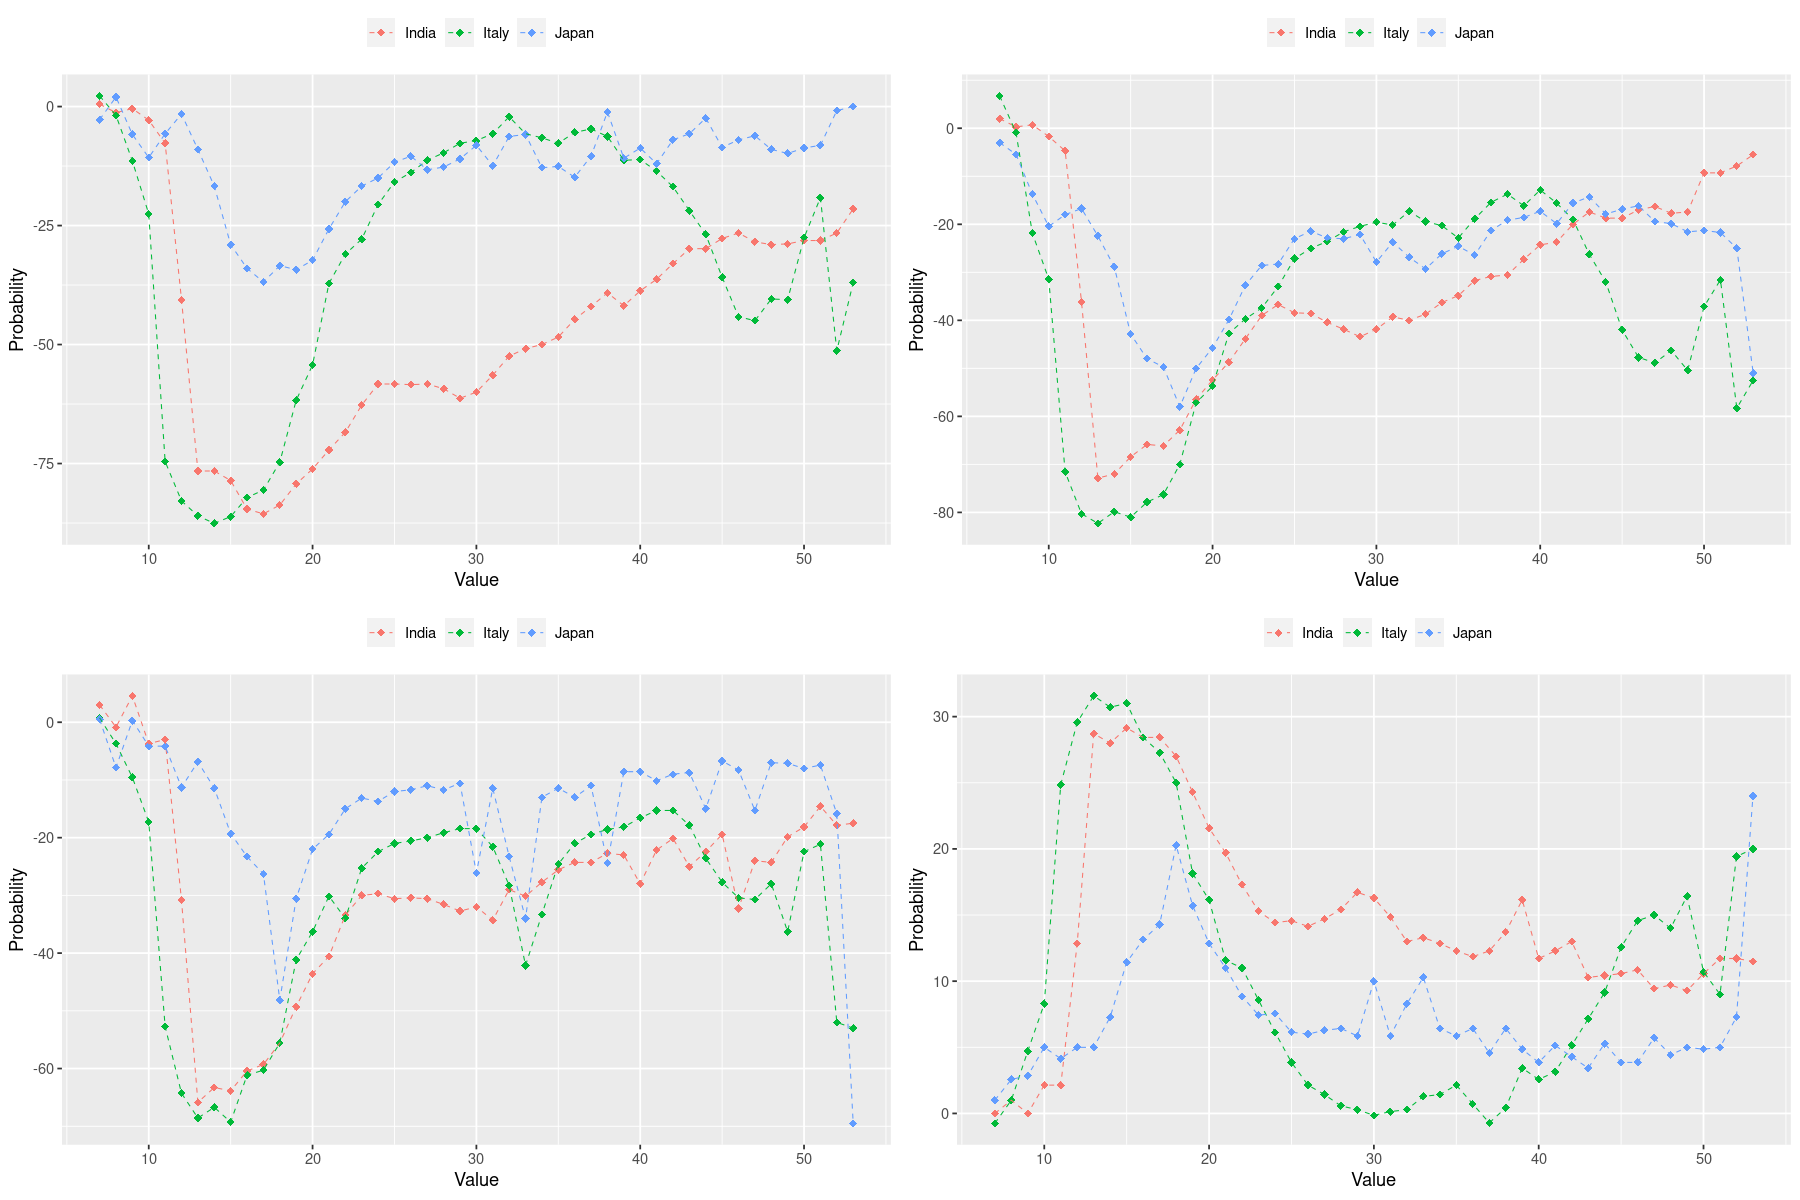

In [6]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = week_gdata) + 
    geom_point(aes(x = date, y = ret_recr_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = date, y = ret_recr_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Value", y= "Probability", color = "") +
    theme(legend.position="top")
p2=ggplot(data = week_gdata) + 
    geom_point(aes(x = date, y = transit_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = date, y = transit_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Value", y= "Probability", color = "") +
    theme(legend.position="top")
p3=ggplot(data = week_gdata) + 
    geom_point(aes(x = date, y = work_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = date, y = work_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Value", y= "Probability", color = "") +
    theme(legend.position="top")
p4=ggplot(data = week_gdata) + 
    geom_point(aes(x = date, y = home_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = date, y = home_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Value", y= "Probability", color = "")+
    theme(legend.position="top")
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)